In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import scanpy as sc 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [31]:
adata = sc.read_h5ad('/Users/koush/Desktop/training_data/snrna_human_tonsil.h5ad')
adata

AnnData object with n_obs × n_vars = 5778 × 3549
    obs: 'cell_type', 'author_cell_type', 'cell_type_int', 'leiden', 'leiden_R', 'cell_type_2'
    uns: 'author_cell_type_colors', 'cell_type_2_colors', 'cell_type_colors', 'dendrogram_leiden', 'leiden', 'leiden_R', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'ora_estimate', 'ora_pvals', 'spatial'
    varm: 'PCs'
    layers: 'imputed_count', 'normalized_count'
    obsp: 'connectivities', 'distances'

<Axes: title={'center': 'cell_type_2'}, xlabel='X_umap1', ylabel='X_umap2'>

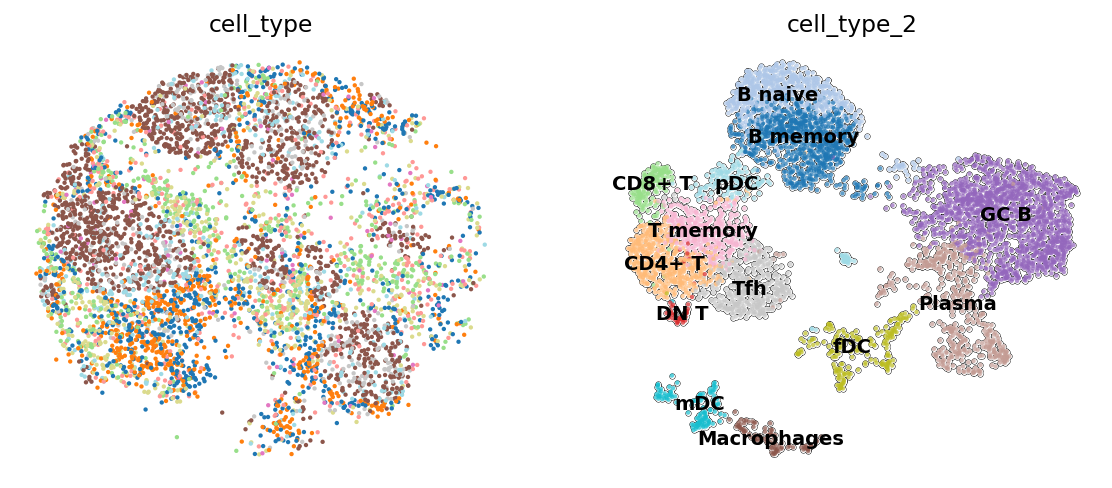

In [69]:
f, ax = plt.subplots(1, 2, figsize=(10, 4))
sc.pl.embedding(adata, basis='spatial', color=['cell_type'], 
    frameon=False, edgecolor='black', s=20, linewidth=0, 
palette='tab20', ax=ax[0], show=False, legend_loc=None, 
add_outline=False)

sc.pl.embedding(adata, basis='X_umap', color=['cell_type_2'], 
    frameon=False, edgecolor='black', s=20, linewidth=0, 
palette='tab20', ax=ax[1], show=False, legend_loc='on data', 
add_outline=True, outline_width=(0.1, 0.1))


In [70]:
adata.obs.cell_type.value_counts()

cell_type
GC B           1581
B memory        873
B naive         715
T cells         593
CD4+ T          530
DC              494
Plasma          490
Tfh             404
Macrophages      98
Name: count, dtype: int64

<Axes: ylabel='cell_type'>

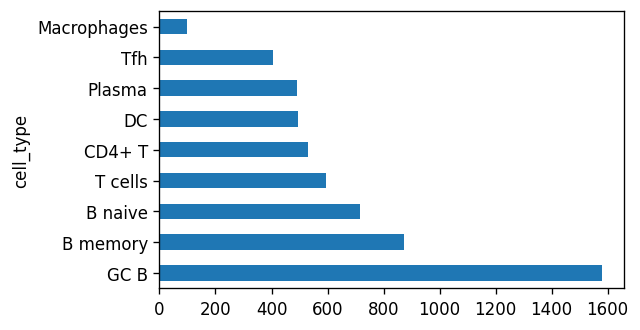

In [71]:
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 120

adata.obs.cell_type.value_counts().plot(kind='barh')

In [72]:
import sys
sys.path.append('/Users/koush/Projects/SpaceOracle/src/')

In [73]:
import celloracle as co

%matplotlib inline
plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams['figure.dpi'] = 180

In [74]:
# %%time

# sc.tl.pca(adata, svd_solver='arpack')
# sc.pp.neighbors(adata, n_neighbors=15, use_rep='X')
# sc.tl.umap(adata)
# sc.tl.leiden(adata, resolution=0.5)

In [77]:
adata.X.max()

8.8678228953803

In [78]:
adata.layers["raw_count"] = np.exp(adata.X) - 1

In [79]:
adata

AnnData object with n_obs × n_vars = 5778 × 3549
    obs: 'cell_type', 'author_cell_type', 'cell_type_int', 'leiden', 'leiden_R', 'cell_type_2'
    uns: 'author_cell_type_colors', 'cell_type_2_colors', 'cell_type_colors', 'dendrogram_leiden', 'leiden', 'leiden_R', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'ora_estimate', 'ora_pvals', 'spatial'
    varm: 'PCs'
    layers: 'imputed_count', 'normalized_count', 'raw_count'
    obsp: 'connectivities', 'distances'

In [80]:
# sc.pp.pca(adata, n_comps=50)
# sc.pp.neighbors(adata, n_neighbors=7)
# sc.tl.umap(adata, min_dist=0.5)

In [81]:
%matplotlib inline

oracle = co.Oracle()

adata.X = adata.layers["raw_count"].copy()

oracle.import_anndata_as_raw_count(
    adata=adata,
    cluster_column_name="cell_type",
    embedding_name="X_umap"
)

oracle.pcs = [True]
oracle.k_knn_imputation = 1
oracle.knn = 1

In [82]:
base_GRN = co.data.load_human_promoter_base_GRN()
oracle.import_TF_data(TF_info_matrix=base_GRN)

Loading prebuilt promoter base-GRN. Version: hg19_gimmemotifsv5_fpr2


In [83]:
%%time

links = oracle.get_links(
    cluster_name_for_GRN_unit="cell_type", 
    alpha=10,
    verbose_level=2
)

  0%|          | 0/9 [00:00<?, ?it/s]

Inferring GRN for B memory...


  0%|          | 0/3393 [00:00<?, ?it/s]

 11%|█         | 1/9 [01:48<14:24, 108.05s/it]

Inferring GRN for B naive...


  0%|          | 0/3393 [00:00<?, ?it/s]

 22%|██▏       | 2/9 [03:35<12:32, 107.46s/it]

Inferring GRN for CD4+ T...


  0%|          | 0/3393 [00:00<?, ?it/s]

 33%|███▎      | 3/9 [05:21<10:42, 107.14s/it]

Inferring GRN for DC...


  0%|          | 0/3393 [00:00<?, ?it/s]

 44%|████▍     | 4/9 [07:09<08:56, 107.24s/it]

Inferring GRN for GC B...


  0%|          | 0/3393 [00:00<?, ?it/s]

 56%|█████▌    | 5/9 [08:59<07:13, 108.34s/it]

Inferring GRN for Macrophages...


  0%|          | 0/3393 [00:00<?, ?it/s]

 67%|██████▋   | 6/9 [10:48<05:25, 108.49s/it]

Inferring GRN for Plasma...


  0%|          | 0/3393 [00:00<?, ?it/s]

 78%|███████▊  | 7/9 [12:36<03:36, 108.48s/it]

Inferring GRN for T cells...


  0%|          | 0/3393 [00:00<?, ?it/s]

 89%|████████▉ | 8/9 [14:23<01:48, 108.07s/it]

Inferring GRN for Tfh...


  0%|          | 0/3393 [00:00<?, ?it/s]

100%|██████████| 9/9 [16:10<00:00, 107.88s/it]

CPU times: user 12min 29s, sys: 25 s, total: 12min 54s
Wall time: 16min 11s


In [84]:
links.filter_links()
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
oracle.fit_GRN_for_simulation(
    alpha=10, 
    use_cluster_specific_TFdict=True
)

  0%|          | 0/9 [00:00<?, ?it/s]

In [85]:
import pickle

with open('/Users/koush/Desktop/training_data/snrna_human_tonsil_colinks.pkl', 'wb') as f:
    pickle.dump(links.links_dict, f)